<a href="https://colab.research.google.com/github/garvit968/Portal/blob/main/Car_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
car_df = pd.read_csv('car data.csv')

In [ ]:
car_df.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
77,corolla,2004,1.50,12.35,135154,Petrol,Dealer,Automatic,0
198,Bajaj Discover 125,2011,0.15,0.57,35000,Petrol,Individual,Manual,1
30,ritz,2012,3.10,5.98,51439,Diesel,Dealer,Manual,0
228,verna,2012,4.95,9.40,60000,Diesel,Dealer,Manual,0
120,Bajaj Pulsar RS200,2016,1.05,1.26,5700,Petrol,Individual,Manual,0


In [ ]:
car_df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
car_df.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace= True)
car_df.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace= True)
car_df.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace= True)

<ipython-input-5-01f2518f8560>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_df.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace= True)
<ipython-input-5-01f2518f8560>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_df.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace= True)
<ipython-input-5-01f2518f8560>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False

In [ ]:
X=car_df.drop(['Car_Name','Selling_Price'], axis=1)
Y=car_df['Selling_Price']

In [ ]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state = 42)

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
data_pred = lr.predict(X_train)

In [ ]:
error_sc = metrics.r2_score(Y_train, data_pred)
error_sc

0.8806173715719129

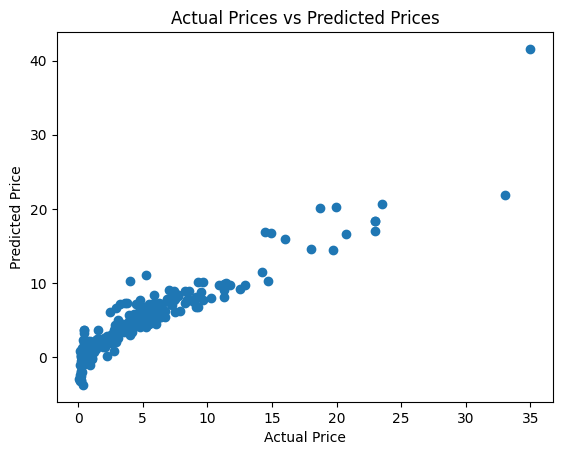

In [ ]:
 plt.scatter(Y_train, data_pred)
 plt.xlabel("Actual Price")
 plt.ylabel("Predicted Price")
 plt.title("Actual Prices vs Predicted Prices")
 plt.show()

In [ ]:
data_pred_test = lr.predict(X_test)

In [ ]:
metrics.r2_score(Y_test, data_pred_test)

0.8311069476244144

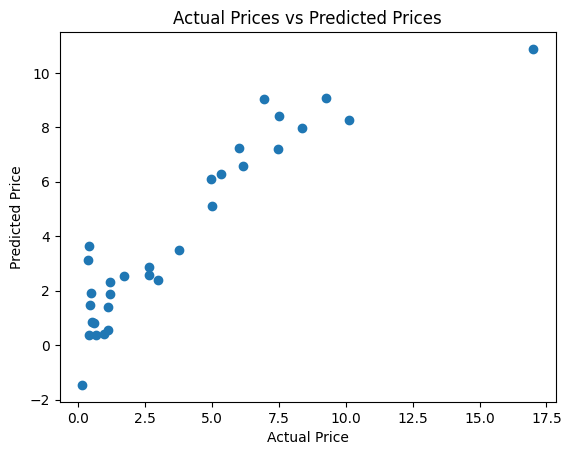

In [ ]:
 plt.scatter(Y_test, data_pred_test)
 plt.xlabel("Actual Price")
 plt.ylabel("Predicted Price")
 plt.title("Actual Prices vs Predicted Prices")
 plt.show()